# Disease Prediction
## (Data Analysis and Model Selection)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

<h3>Loading the data</h3>
The dataset used here is available <a href=https://www.kaggle.com/itachi9604/disease-symptom-description-dataset>here</a><br>
(Disease Symptom Dataset)

In [16]:
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

<h3>Analysing the DataSet</h3><br>
Pandas_profiler library is used to get an indepth analysis of the dataset for further action<br>
This analysis consists of steps such as finding and correcting the missing data,<br>finding correlations,finding out the most common diseases and symptoms and so on.

In [17]:
profile = ProfileReport(train, title='Disease Prediction Model Profile', html = { 'style' : {'full_width':True}})

In [18]:
profile

In [19]:
train=train.drop(['fluid_overload'], axis=1)
test=test.drop(['fluid_overload'], axis = 1)

<h3>Model Selection</h3>

After looking at the data analysis, we select a few of the algorithms which we thinnk are best suited for this data and conduct experiments to find out which is the best and most accurate algorithm for this task

In [20]:
log = LogisticRegression()
dt = DecisionTreeClassifier(criterion='entropy')
ran = RandomForestClassifier(n_estimators = 10)

In [21]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran}
algo_train_scores={}
algo_test_scores={}

In [22]:
def evaluate(train_data , kmax , algo):
    test_scores={}
    train_scores={}
    for i in range (2 , kmax , 2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = train_data
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(['prognosis'] , axis = 1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(['prognosis'] , axis = 1)
            y_test = test_data['prognosis']
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print('kvalue: ',i)
    return (test_scores,train_scores)

In [23]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(train,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8768292682926829, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 0.998780487804878, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


In [24]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)
df_train

,l_o_g,d_t,r_a_n
2,1.0,0.876829,0.99878
4,1.0,1.000000,1.00000
6,1.0,1.000000,1.00000
8,1.0,1.000000,1.00000
10,1.0,1.000000,1.00000


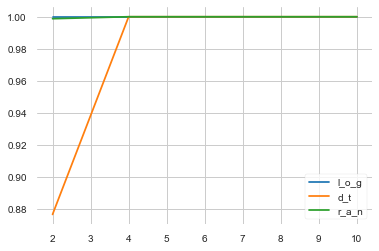

In [25]:
import matplotlib.pyplot as plt
df_train.plot(grid = 1)
plt.show()

## Selected Model :

Decision Tree ( Strong learning curve ) <br>
kvalue : 4

In [26]:
kf = KFold(n_splits = 4)
data = train
for train,test in kf.split(data):
    train_data = data.iloc[train,:]
    test_data = data.iloc[test,:]
    x_train = train_data.drop(['prognosis'] , axis = 1)
    y_train = train_data['prognosis']
    x_test = test_data.drop(['prognosis'] , axis = 1)
    y_test = test_data['prognosis']
    algo_model = dt.fit(x_train,y_train)
    train_score = algo_model.score(x_train,y_train)
    y_pred = algo_model.predict(x_test)
    test_score = accuracy_score(y_test,y_pred)
print("Train Score :" +str(train_score))
print("Test  Score :" +str(test_score))

Train Score :1.0
Test  Score :1.0


In [27]:
import pickle
pickle.dump(dt,open('model.pkl','wb'))

# Accuracy: 100%

Now the accuracy percentage seems to be getting overweight. But in this case the target feature has almost balanced data for each of the labels.

So overfitting should not be a problem.

Some more data would have helped in understanding. Will check if I find any similar dataset.

#### For now this is the end of the analysis. Please do ⭐ the repository if you like it and let us know in the comments if there is anything wrong or how to improve it.